In [1]:
import mglearn

In [36]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC

# Linear

In [41]:
X,y = make_blobs(centers=4, random_state=8)
y=y%2

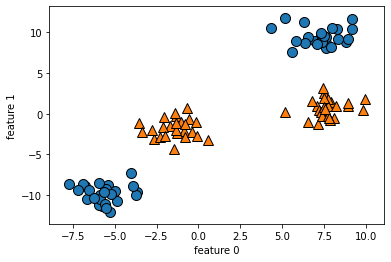

In [42]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1');

In [43]:
lrsvc= LinearSVC().fit(X,y)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


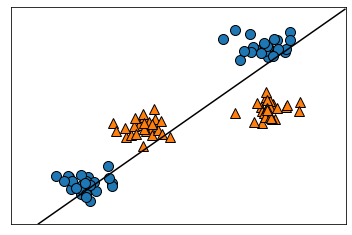

In [45]:
mglearn.plots.plot_2d_separator(lrsvc, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y);

In [50]:
import numpy as np

In [100]:
Xnew = np.hstack([X, X[:,1:]**2])

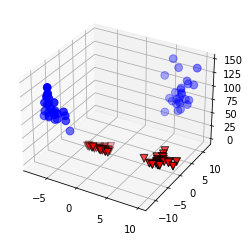

In [101]:
fig = plt.figure()
ax = plt.axes(projection='3d')
mask = y==0
ax.scatter(Xnew[mask, 0], Xnew[mask,1], Xnew[mask,2], c='b',cmap=mglearn.cm2, s=60)
ax.scatter(Xnew[~mask, 0], Xnew[~mask,1], Xnew[~mask,2], c='r', marker='v', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.view_init(30);

In [102]:
linearsvc3d = LinearSVC().fit(Xnew, y)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


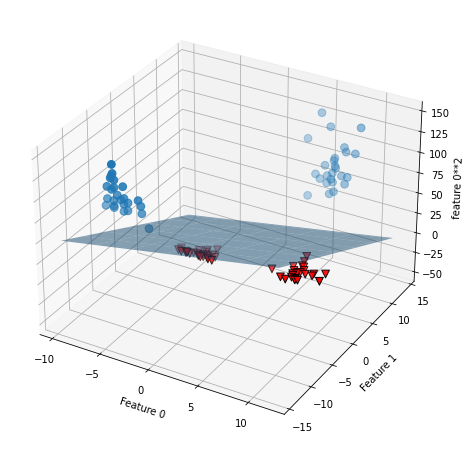

In [120]:
coef, intercept = linearsvc3d.coef_.ravel(), linearsvc3d.intercept_
figure = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
xx1 = np.linspace(Xnew[:,0].min()-2, Xnew[:,0].max()+2, 50)
yy1 = np.linspace(Xnew[:,1].min()-2, Xnew[:,1].max()+2, 50)
XX,YY = np.meshgrid(xx1,yy1)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8, cstride=8, alpha=0.5)
ax.scatter(Xnew[mask,0], Xnew[mask,1], Xnew[mask,2],s=60)
ax.scatter(Xnew[~mask,0], Xnew[~mask,1], Xnew[~mask,2], marker='v', edgecolor='k', c='r', s=60)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('feature 0**2');

In [123]:
XX.shape

(50, 50)

In [122]:
YY.shape

(50, 50)

In [124]:
ZZ = YY**2

In [128]:
dec = linearsvc3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
dec.shape

(2500,)

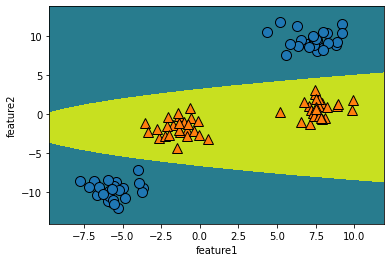

In [134]:
plt.contourf(XX,YY, dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()])
mglearn.discrete_scatter(Xnew[:,0], Xnew[:,1],y)
plt.xlabel('feature1')
plt.ylabel('feature2');

# Non-Linear

In [136]:
from sklearn.svm import SVC

In [153]:
svc.dual_coef_.ravel()>0

array([False, False, False,  True,  True])

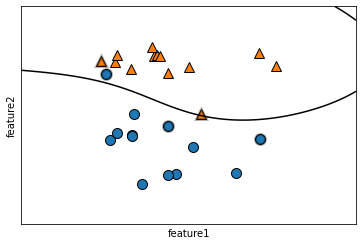

In [161]:
X,y = mglearn.tools.make_handcrafted_dataset()
svc = SVC(kernel ='rbf', gamma=0.1, C=10).fit(X,y)
mglearn.plots.plot_2d_separator(svc,X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
vec = svc.support_vectors_
label = svc.dual_coef_.ravel()>0
mglearn.discrete_scatter(vec[:,0], vec[:,1], label, s=10,markeredgewidth=3, alpha=0.3)
plt.xlabel('feature1')
plt.ylabel('feature2');

## tunning SVM parameters

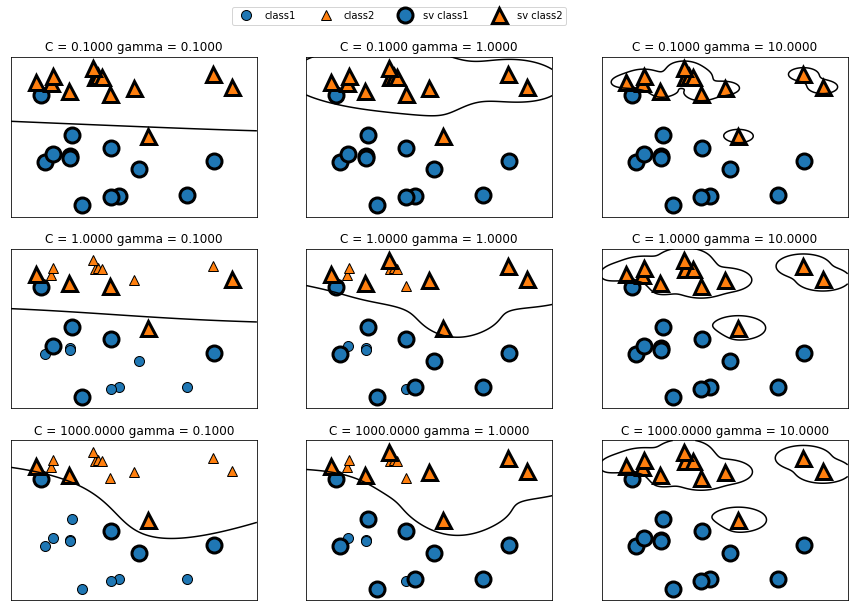

In [369]:
fig, axes = plt.subplots(3,3, figsize=(15,10), subplot_kw=dict(xticks=[], yticks=[]))
for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a) #####plot_svm
axes[0,0].legend(['class1','class2','sv class1','sv class2'], ncol=4, loc=(0.9, 1.2));

# SVC needs to be scaled

In [183]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [184]:
cancer= load_breast_cancer()

In [185]:
Xtrain,Xtest,ytrain,ytest=train_test_split(cancer.data, cancer.target, random_state=0)

In [186]:
svc = SVC()
svc.fit(Xtrain,ytrain)
print(f'train set score: {svc.score(Xtrain,ytrain)}')
print(f'test set score: {svc.score(Xtest, ytest)}')

train set score: 0.903755868544601
test set score: 0.9370629370629371


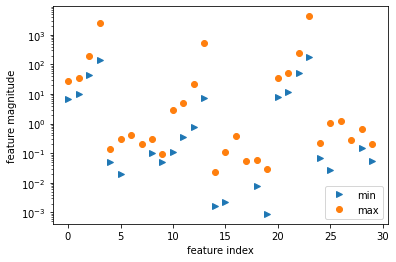

In [195]:
plt.plot(Xtrain.min(axis=0),'>', label='min')
plt.plot(Xtrain.max(axis=0),'o', label='max')
plt.legend(loc=4)
plt.xlabel('feature index')
plt.ylabel('feature magnitude')
plt.yscale('log')

In [226]:
from sklearn.preprocessing import MinMaxScaler

In [227]:
scaler = MinMaxScaler()

In [228]:
Xtrainscaler = scaler.fit_transform(Xtrain)

In [229]:
Xtestscaler = scaler.transform(Xtest)

In [230]:
Xtrainscaler.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [231]:
Xtrainscaler.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [232]:
svc.fit(Xtrainscaler, ytrain)

SVC()

In [233]:
print(f'train score: {svc.score(Xtrainscaler, ytrain)}')
print(f'test score: {svc.score(Xtestscaler, ytest)}')

train score: 0.9835680751173709
test score: 0.972027972027972


In [243]:
svc10 = SVC(C=10)

In [244]:
svc10.fit(Xtrainscaler,ytrain)

SVC(C=10)

In [245]:
print(f'train score: {svc10.score(Xtrainscaler, ytrain)}')
print(f'test score: {svc10.score(Xtestscaler, ytest)}')

train score: 0.9882629107981221
test score: 0.972027972027972


# decision_function and predict_proba

In [248]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles

In [249]:
X,y = make_circles(noise=0.25, factor=0.5, random_state=1)

In [250]:
y_named = np.array(['blue', 'red'])[y]

In [252]:
Xtrain, Xtest, ytrain, ytest, ytrain_name, ytest_name = train_test_split(X,y,y_named)

In [254]:
gbrt = GradientBoostingClassifier()
gbrt.fit(Xtrain, ytrain_name)

GradientBoostingClassifier()

In [255]:
Xtest.shape

(25, 2)

In [256]:
gbrt.decision_function(Xtest).shape

(25,)

In [257]:
gbrt.decision_function(Xtest)

array([ 2.52041343,  4.81939736, -3.09502493, -3.5187815 ,  1.56354693,
        2.99354055, -2.63809958, -2.97908138, -5.91475135,  4.080059  ,
        4.080059  ,  4.81939736,  4.080059  ,  4.81939736,  0.0256775 ,
        1.90805549,  0.0256775 , -3.32010691,  4.81939736,  4.080059  ,
        0.83854317,  4.81939736,  4.41744866,  4.41744866, -4.3665349 ])

### decision function indicates classes

In [260]:
print(f'threholded decision function:\n{gbrt.decision_function(Xtest)>0}')
print(f'prediction:\n{gbrt.predict(Xtest)}')

threholded decision function:
[ True  True False False  True  True False False False  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
 False]
prediction:
['red' 'red' 'blue' 'blue' 'red' 'red' 'blue' 'blue' 'blue' 'red' 'red'
 'red' 'red' 'red' 'red' 'red' 'red' 'blue' 'red' 'red' 'red' 'red' 'red'
 'red' 'blue']


In [272]:
greater_zero = (gbrt.decision_function(Xtest)>0).astype(int) # as indices

In [273]:
pred = gbrt.classes_[greater_zero]

In [271]:
np.all(gbrt.predict(Xtest) == pred)

True

### The range of decision_function can be arbitrary

In [277]:
dec = gbrt.decision_function(Xtest)

In [278]:
print(f'decision funcion maximal:{dec.min()} minimal: {dec.max()}')

decision funcion maximal:-5.914751345746894 minimal: 4.819397357162669


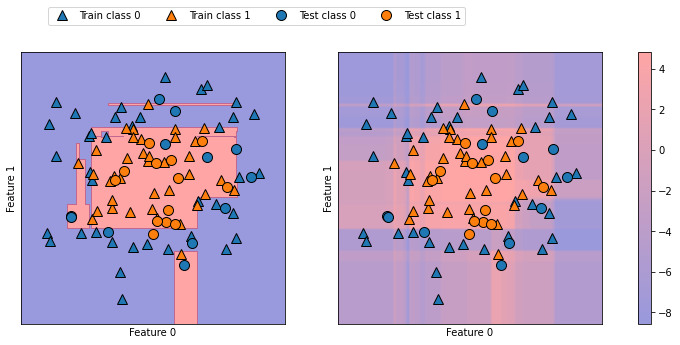

In [300]:
fig, axes = plt.subplots(1,2,figsize=(13,5), subplot_kw=dict(xticks=[], yticks=[]))
mglearn.plots.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.4, cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(Xtrain[:,0], Xtrain[:, 1], ytrain,'^', ax=ax)
    mglearn.discrete_scatter(Xtest[:,0], Xtest[:,1], ytest,'o',ax=ax)
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(score_image, ax=axes.tolist())
axes[0].legend(["Train class 0", "Train class 1", "Test class 0","Test class 1"], ncol=4, loc=(.1, 1.1));

# predict_proba

In [298]:
gbrt.predict_proba(Xtest).shape

(25, 2)

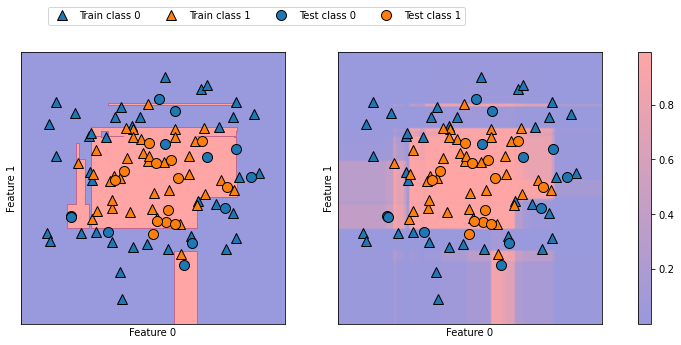

In [303]:
fig, axes = plt.subplots(1,2,figsize=(13,5), subplot_kw=dict(xticks=[], yticks=[]))
mglearn.plots.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.4, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    mglearn.discrete_scatter(Xtrain[:,0], Xtrain[:, 1], ytrain,'^', ax=ax)
    mglearn.discrete_scatter(Xtest[:,0], Xtest[:,1], ytest,'o',ax=ax)
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(score_image, ax=axes.tolist())
axes[0].legend(["Train class 0", "Train class 1", "Test class 0","Test class 1"], ncol=4, loc=(.1, 1.1));

# Uncertainty in Multiclass Classification

In [304]:
from sklearn.datasets import load_iris

In [305]:
iris = load_iris()

In [315]:
Xtrain, Xtest, ytrain, ytest= train_test_split(iris.data, iris.target)

In [316]:
gbrt1 = GradientBoostingClassifier(learning_rate=0.01)
gbrt1.fit(Xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.01)

In [319]:
print(f'shape of decision function: {gbrt1.decision_function(Xtest).shape}')

shape of decision function: (38, 3)


In [325]:
print(f'Argmax of decision function:\n{np.argmax(gbrt1.decision_function(Xtest), axis=1)}')
print(f'prediction:\n{gbrt1.predict(Xtest)}')

Argmax of decision function:
[1 0 2 1 2 1 0 0 1 1 1 0 2 1 2 1 1 1 1 1 0 1 0 1 2 0 2 0 0 2 1 1 0 0 1 0 1
 0]
prediction:
[1 0 2 1 2 1 0 0 1 1 1 0 2 1 2 1 1 1 1 1 0 1 0 1 2 0 2 0 0 2 1 1 0 0 1 0 1
 0]


In [334]:
print(f'shape of predict_proba: {gbrt1.predict_proba(Xtest).shape}')
print("Sums:{}".format(gbrt1.predict_proba(Xtest)[:6].sum(axis=1)))

shape of predict_proba: (38, 3)
Sums: [1. 1. 1. 1. 1. 1.]


In [332]:
print(f'Argmax of predict_proba:\n{np.argmax(gbrt1.predict_proba(Xtest), axis=1)}')
print(f'prediction:\n{gbrt1.predict(Xtest)}')

Argmax of predict_proba:
[1 0 2 1 2 1 0 0 1 1 1 0 2 1 2 1 1 1 1 1 0 1 0 1 2 0 2 0 0 2 1 1 0 0 1 0 1
 0]
prediction:
[1 0 2 1 2 1 0 0 1 1 1 0 2 1 2 1 1 1 1 1 0 1 0 1 2 0 2 0 0 2 1 1 0 0 1 0 1
 0]


In [336]:
from sklearn.linear_model import LogisticRegression

In [337]:
log = LogisticRegression()

In [358]:
ytrain_name=iris.target_names[ytrain]
log.fit(Xtrain, ytrain_name)
print(f'unique class in training data: {log.classes_}')
print(f'prediction: {log.predict(Xtest)[:6]}')
dec = np.argmax(log.decision_function(Xtest), axis=1)
print(f'argmax of decision function: {dec[:6]}')
print(f'argmax combined with classes_:{log.classes_[np.argmax(log.decision_function(Xtest), axis=1)][:6]}')

unique class in training data: ['setosa' 'versicolor' 'virginica']
prediction: ['versicolor' 'setosa' 'virginica' 'versicolor' 'virginica' 'versicolor']
argmax of decision function: [1 0 2 1 2 1]
argmax combined with classes_:['versicolor' 'setosa' 'virginica' 'versicolor' 'virginica' 'versicolor']
